In [388]:
from scipy.fftpack import fft,fftfreq
import numpy as np
from fractions import gcd
import matplotlib.pyplot as plt
import cmath
"""
A3-Part-1: Minimize energy spread in DFT of sinusoids
Given a signal consisting of two sinusoids, write a function that selects the first M samples from 
the signal and returns the positive half of the DFT magnitude spectrum (in dB), such that it has 
only two non-zero values. 

M is to be calculated as the smallest positive integer for which the positive half of the DFT magnitude 
spectrum has only two non-zero values. To get the positive half of the spectrum, first compute the 
M point DFT of the input signal (for this you can use the fft function of scipy.fftpack, which is 
already imported in this script). Consider only the first (M/2)+1 samples of the DFT and compute the
magnitude spectrum of the positive half (in dB) as mX = 20*log10(abs(X[:M/2+1])), where X is the DFT 
of the input.

The input arguments to this function are the input signal x (of length W >= M) consisting of two 
sinusoids of frequency f1 and f2, the sampling frequency fs and the value of frequencies f1 and f2. 
The function should return the positive half of the magnitude spectrum mX. For this question, 
you can assume the input frequencies f1 and f2 to be positive integers and factors of fs, and 
that M is even. 

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small
values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less 
than 1e-6 (or -120 dB) can be considered to be zero. 

HINT: The DFT magnitude spectrum of a sinusoid has only one non-zero value (in the positive half of 
the DFT spectrum) when its frequency coincides with one of the DFT bin frequencies. This happens when 
the DFT size (M in this question) contains exactly an integer number of periods of the sinusoid. 
Since the signal in this question consists of two sinusoids, this condition should hold true for each 
of the sinusoids, so that the DFT magnitude spectrum has only two non-zero values, one per sinusoid. 

M can be computed as the Least Common Multiple (LCM) of the sinusoid periods (in samples). The LCM of
two numbers x, y can be computed as: x*y/GCD(x,y), where GCD denotes the greatest common divisor. In 
this script (see above) we have already imported fractions.gcd() function that computes the GCD. 

Test case 1: For an input signal x sampled at fs = 10000 Hz that consists of sinusoids of frequency 
f1 = 80 Hz and f2 = 200 Hz, you need to select M = 250 samples of the signal to meet the required 
condition. In this case, output mX is 126 samples in length and has non-zero values at bin indices 2 
and 5 (corresponding to the frequency values of 80 and 200 Hz, respectively). You can create a test 
signal x by generating and adding two sinusoids of the given frequencies.

Test case 2: For an input signal x sampled at fs = 48000 Hz that consists of sinusoids of frequency 
f1 = 300 Hz and f2 = 800 Hz, you need to select M = 480 samples of the signal to meet the required 
condition. In this case, output mX is 241 samples in length and has non-zero values at bin indices 3 
and 8 (corresponding to the frequency values of 300 and 800 Hz, respectively). You can create a test 
signal x by generating and adding two sinusoids of the given frequencies.
"""

def minimizeEnergySpreadDFT(x, fs, f1, f2):
    """
    Inputs:
        x (numpy array) = input signal 
        fs (float) = sampling frequency in Hz
        f1 (float) = frequency of the first sinusoid component in Hz
        f2 (float) = frequency of the second sinusoid component in Hz
    Output:
        The function should return 
        mX (numpy array) = The positive half of the DFT spectrum (in dB) of the M sample segment of x. 
                           mX is (M/2)+1 samples long (M is to be computed)
    """
    ## Your code here
    t1=(1/f1)*fs
    t2=(1/f2)*fs
    M= int((t1*t2)/gcd(t1,t2))
    X=fft(x[:M])
    wx= int((M/2)+1)
    
    mX = 20*np.log10(abs(X[:wx]))
    for i in range(len(mX)):
        if mX[i] < -120:
            mX[i]=0
    return mX
        
        
    
                     

                     
         



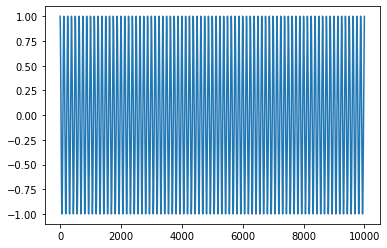

C:\Users\Public\Documents\pit\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


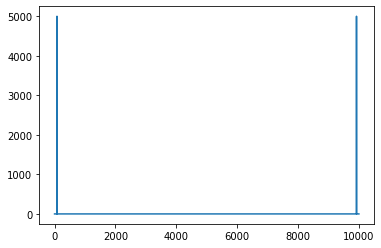

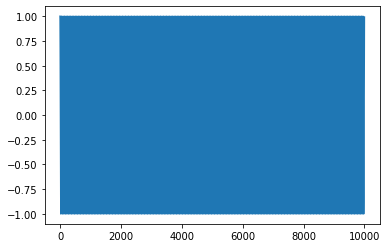

C:\Users\Public\Documents\pit\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


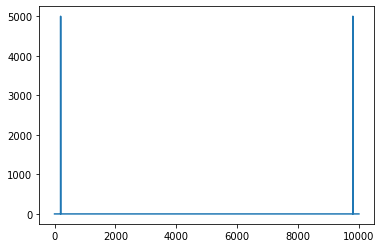

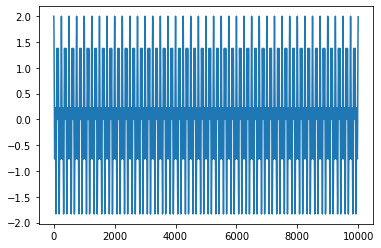

C:\Users\Public\Documents\pit\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


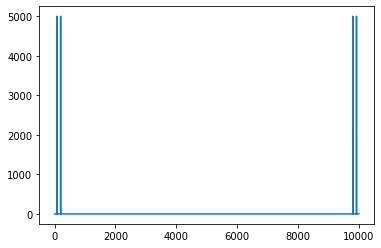

C:\Users\Public\Documents\pit\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.


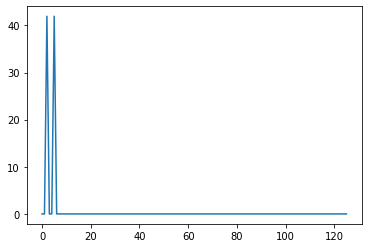

array([ 0.        ,  0.        , 41.93820026,  0.        ,  0.        ,
       41.93820026,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [389]:
fs=10000
f1=80
f2=200
t= np.arange(0,1,1/fs)
x1= np.cos(2*np.pi*f1*t)
x2= np.cos(2*np.pi*f2*t)
x=x1+x2
plt.plot(x1)
plt.show()
plt.plot(fft(x1))
plt.show()
plt.plot(x2)
plt.show()
plt.plot(fft(x2))
plt.show()
plt.plot(x1+x2)
plt.show()
plt.plot(fft(x1+x2))
plt.show()
X=minimizeEnergySpreadDFT(x, fs, f1, f2)
plt.plot(X)
plt.show()
X


In [738]:
from scipy.fftpack import fft
import numpy as np

"""
A3-Part-2: Optimal zero-padding

Given a sinusoid, write a function that computes the DFT of the sinusoid after zero-padding and returns
the positive half of the magnitude spectrum (in dB). Zero-padding needs to be done such that one of 
the bin frequencies of the DFT coincides with the frequency of the sinusoid. Choose the minimum 
zero-padding length for which this condition is satisfied. 

The input arguments are the sinusoid x of length M, sampling frequency fs and the frequency of the 
sinusoid f. The output is the positive half of the magnitude spectrum mX computed using the N point 
DFT (N >= M) of x after zero-padding x to length N appropriately as required. 

To get the positive half of the spectrum, first compute the N point DFT of the zero-padded input signal 
(for this you can use the fft function of scipy.fftpack, which is already imported in this script). 
Consider only the first (N/2)+1 samples of the DFT and compute the magnitude spectrum of the positive 
half (in dB) as mX = 20*log10(abs(X[:(N/2)+1])), where X is the N point DFT of the zero-padded input.

For this exercise, you can assume that the frequency of the sinusoid f is a positive integer and a 
factor of the sampling rate fs. The input parameters will be given in such a way that N will be even.
Note that the numerical value of f is an integer but the data type is float, for example 1.0, 2.0, 
55.0 etc. This is to avoid issues in python related with division by a integer.

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small
values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less 
than 1e-6 (or -120 dB) can be considered to be zero. 

HINT: One of the DFT bin frequencies coincides with the frequency f of a sinusoid when the DFT size 
(N in this question) contains exactly an integer number of periods of the sinusoid. For example, 
if f = 100 Hz and fs = 1000 Hz, one period of the sinusoid has 10 samples. Then given a signal of length 
M = 25 samples, there are 2.5 periods in it. The minimum zero-padding length here would be 5 samples 
(0.5 period), so that the DFT size N = 30 corresponds to 3 periods of a sinusoid of frequency f=100 Hz.

Test case 1: For a sinusoid x with f = 100 Hz, M = 25 samples and fs = 1000 Hz, you will need to 
zero-pad by 5 samples and compute an N = 30 point DFT. In the magnitude spectrum, you can see a 
maximum value at bin index 3 corresponding to the frequency of 100 Hz. The output mX you return is 
16 samples in length. 

Test case 2: For a sinusoid x with f = 250 Hz, M = 210 samples and fs = 10000 Hz, you will need to 
zero-pad by 30 samples and compute an N = 240 point DFT. In the magnitude spectrum, you can see a 
maximum value at bin index 6 corresponding to the frequency of 250 Hz. The output mX you return is 
121 samples in length. 

"""
def optimalZeropad(x, fs, f):
    """
    Inputs:
        x (numpy array) = input signal of length M
        fs (float) = sampling frequency in Hz
        f (float) = frequency of the sinusoid in Hz
    Output:
        The function should return
        mX (numpy array) = The positive half of the DFT spectrum of the N point DFT after zero-padding 
                        x appropriately (zero-padding length to be computed). mX is (N/2)+1 samples long
    """
    T=fs/f
    N=len(x)
    M=len(x)
    
    
    frac= M%T
    while frac != 0:
        M +=1
        frac=M%T

    xp=np.append(x,np.zeros(M-N))
    X=fft(xp)
    pX=X[:int(M/2)+1]
    
    mX = 20*np.log10(abs(pX))
    for i in range(len(mX)):
        if mX[i] < 10:
            mX[i]=0

    return mX




3


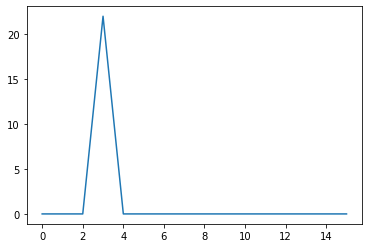

In [739]:
fs=1000
f=100
N=25
w=np.arange(N)
x=np.cos(2*np.pi*f*w/fs)


plt.plot(optimalZeropad(x, fs, f))
f=optimalZeropad(x, fs, f)
for i in range(len(f)):
    if f[i]==max(f):
        print(i)
    

In [771]:
import numpy as np
from scipy.fftpack import fft, fftshift
import math


"""
A3-Part-3: Symmetry properties of the DFT

Write a function to check if the input signal is real and even using the symmetry properties of its
DFT. The function will return the result of this test, the zerophase windowed version of the input 
signal (dftbuffer), and the DFT of the dftbuffer. 

Given an input signal x of length M, do a zero phase windowing of x without any zero-padding (a 
dftbuffer, on the same lines as the fftbuffer in sms-tools). Then compute the M point DFT of the 
zero phase windowed signal and use the symmetry of the computed DFT to test if the input signal x 
is real and even. Return the result of the test, the dftbuffer computed, and the DFT of the dftbuffer. 

The input argument is a signal x of length M. The output is a tuple with three elements 
(isRealEven, dftbuffer, X), where 'isRealEven' is a boolean variable which is True if x is real 
and even, else False. dftbuffer is the M length zero phase windowed version of x. X is the M point 
DFT of the dftbuffer. 

To make the problem easier, we will use odd length input sequence in this question (M is odd). 

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small
values < 1e-12 in magnitude. For practical purposes, all values with absolute value less than 1e-6 
can be considered to be zero. Use an error tolerance of 1e-6 to compare if two floating point arrays 
are equal. 

Caveat: Use the imaginary part of the spectrum instead of the phase to check if the input signal is 
real and even.

Test case 1: If x = np.array([ 2, 3, 4, 3, 2 ]), which is a real and even signal (after zero phase 
windowing), the function returns (True, array([ 4., 3., 2., 2., 3.]), array([14.0000+0.j, 2.6180+0.j, 
0.3820+0.j, 0.3820+0.j, 2.6180+0.j])) (values are approximate)

Test case 2: If x = np.array([1, 2, 3, 4, 1, 2, 3]), which is not a even signal (after zero phase 
windowing), the function returns (False,  array([ 4.,  1.,  2.,  3.,  1.,  2.,  3.]), array([ 16.+0.j, 
2.+0.69j, 2.+3.51j, 2.-1.08j, 2.+1.08j, 2.-3.51j, 2.-0.69j])) (values are approximate)
"""

def testRealEven(x):
    """
    Inputs:
        x (numpy array)= input signal of length M (M is odd)
    Output:
        The function should return a tuple (isRealEven, dftbuffer, X)
        isRealEven (boolean) = True if the input x is real and even, and False otherwise
        dftbuffer (numpy array, possibly complex) = The M point zero phase windowed version of x 
        X (numpy array, possibly complex) = The M point DFT of dftbuffer 
    """
    ## Your code here
    M=len(x)
    fftbuffer = np.zeros(M)
    fftbuffer[:int(M/2)+1]=x[int(M/2):]
    fftbuffer[int(M/2)+1:] = x[:int(M/2)]   
    X=fft(fftbuffer)
    if np.imag(X.all())==0:
        print("True",fftbuffer,X)
    else:
        print("False",fftbuffer,X)



   



In [1006]:
import sys
sys.path.append('../../software/models/')
from dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt
import numpy as np
from utilFunctions import wavread, wavwrite

"""
A3-Part-4: Suppressing frequency components using DFT model

Given a frame of the signal, write a function that uses the dftModel functions to suppress all the 
frequency components <= 70Hz in the signal and returns the output of the dftModel 
with and without filtering. 

You will use the DFT model to implement a very basic form of filtering to suppress frequency components. 
When working close to mains power lines, there is a 50/60 Hz hum that can get introduced into the 
audio signal. You will try to remove that using a basic DFT model based filter. You will work on just 
one frame of a synthetic audio signal to see the effect of filtering. 

You can use the functions dftAnal and dftSynth provided by the dftModel file of sms-tools. Use dftAnal 
to obtain the magnitude spectrum (in dB) and phase spectrum of the audio signal. Set the values of 
the magnitude spectrum that correspond to frequencies <= 70 Hz to -120dB (there may not be a bin 
corresponding exactly to 70 Hz, choose the nearest bin of equal or higher frequency, e.g., using np.ceil()).
If you have doubts converting from frequency (Hz) to bins, you can review the beginning of theory lecture 2T1.

Use dftSynth to synthesize the filtered output signal and return the output. The function should also return the 
output of dftSynth without any filtering (without altering the magnitude spectrum in any way). 
You will use a hamming window to smooth the signal. Hence, do not forget to scale the output signals 
by the sum of the window values (as done in sms-tools/software/models_interface/dftModel_function.py). 
To understand the effect of filtering, you can plot both the filtered output and non-filtered output 
of the dftModel. 

Please note that this question is just for illustrative purposes and filtering is not usually done 
this way - such sharp cutoffs introduce artifacts in the output. 

The input is a M length input signal x that contains undesired frequencies below 70 Hz, sampling 
frequency fs and the FFT size N. The output is a tuple with two elements (y, yfilt), where y is the 
output of dftModel with the unaltered original signal and yfilt is the filtered output of the dftModel.

Caveat: In python (as well as numpy) variable assignment is by reference. if you assign B = A, and 
modify B, the value of A also gets modified. If you do not want this to happen, consider using B = A.copy(). 
This creates a copy of A and assigns it to B, and hence, you can modify B without affecting A.

Test case 1: For an input signal with 40 Hz, 100 Hz, 200 Hz, 1000 Hz components, yfilt will only contain
100 Hz, 200 Hz and 1000 Hz components. 

Test case 2: For an input signal with 23 Hz, 36 Hz, 230 Hz, 900 Hz, 2300 Hz components, yfilt will only contain
230 Hz, 900 Hz and 2300 Hz components. 
"""
def suppressFreqDFTmodel(x, fs, N):
    """
    Inputs:
        x (numpy array) = input signal of length M (odd)
        fs (float) = sampling frequency (Hz)
        N (positive integer) = FFT size
    Outputs:
        The function should return a tuple (y, yfilt)
        y (numpy array) = Output of the dftSynth() without filtering (M samples long)
        yfilt (numpy array) = Output of the dftSynth() with filtering (M samples long)
    The first few lines of the code have been written for you, do not modify it. 
    """
    M = len(x)
    w = get_window('hamming', M)
    outputScaleFactor = sum(w)
    fr=70*N/fs
    ## Your code here
    
    w = get_window('hamming',N)
    n=np.arange(M)
    
    X,P=dftAnal(x,w,N)
    bin = int(np.ceil(70*len(x)/fs))
    fb=np.zeros(len(X))-120
    fb[bin:]=X[bin:]
    yfil=dftSynth(fb,P,N)*outputScaleFactor
    
    return X,fb,x,yfil



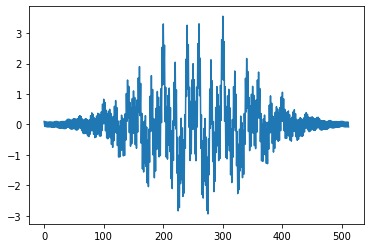

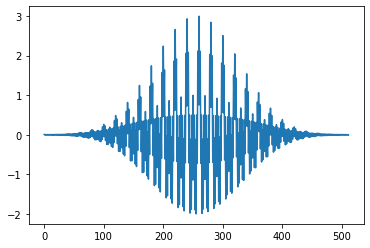

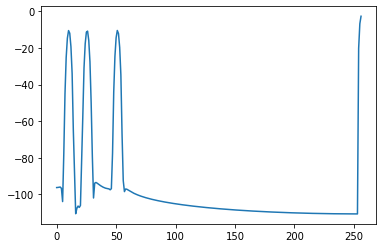

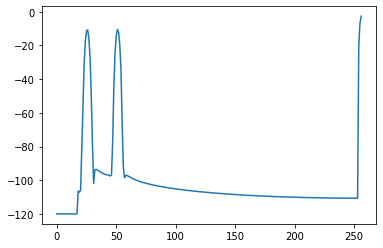

In [1011]:
"""Test case 1: For an input signal with 40 Hz, 100 Hz, 200 Hz, 1000 Hz components, yfilt will only contain
100 Hz, 200 Hz and 1000 Hz components. """
f1=40
f2=100
f3=200
f4=1000
M=512
fs=2000
N=512
bin = int(np.ceil(70*len(X)/fs))
w = get_window('hamming',N)
n=np.arange(M)
x=(np.cos(2*np.pi*f1*n/fs)*w+np.cos(2*np.pi*f2*n/fs)*w+np.cos(2*np.pi*f3*n/fs)*w+np.cos(2*np.pi*f4*n/fs))*w
X,Y,x,y=suppressFreqDFTmodel(x, fs, N)
plt.plot(x)
plt.show()
plt.plot(y)
plt.show()
plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()
wavwrite(x,fs,r"C:\Users\Public\Documents\DSP\sms-tools-master\workspace\A3\sig.wav")
wavwrite(y,fs,r"C:\Users\Public\Documents\DSP\sms-tools-master\workspace\A3\sigf.wav")

wavwrite(X,fs,r"C:\Users\Public\Documents\DSP\sms-tools-master\workspace\A3\fsig.wav")

wavwrite(Y,fs,r"C:\Users\Public\Documents\DSP\sms-tools-master\workspace\A3\fsigf.wav")



In [1080]:
import numpy as np
import sys
sys.path.append('../../software/models/')
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy.signal import get_window
from dftModel import dftAnal
"""
A3-part-5: FFT size and zero-padding (Optional)

Write a function that takes in an input signal, computes three different FFTs on the input and returns 
the first 80 samples of the positive half of the FFT magnitude spectrum (in dB) in each case. 

This part is a walk-through example to provide some insights into the effects of the length of signal 
segment, the FFT size, and zero-padding on the FFT of a sinusoid. The input to the function is x, which
is 512 samples of a real sinusoid of frequency 110 Hz and the sampling frequency fs = 1000 Hz. You will 
first extract the first 256 samples of the input signal and store it as a separate variable xseg. You 
will then generate two 'hamming' windows w1 and w2 of size 256 and 512 samples, respectively (code given
below). The windows are used to smooth the input signal. Use dftAnal to obtain the positive half of the 
FFT magnitude spectrum (in dB) for the following cases:
Case-1: Input signal xseg (256 samples), window w1 (256 samples), and FFT size of 256
Case-2: Input signal x (512 samples), window w2 (512 samples), and FFT size of 512
Case-3: Input signal xseg (256 samples), window w1 (256 samples), and FFT size of 512 (Implicitly does a 
        zero-padding of xseg by 256 samples)
Return the first 80 samples of the positive half of the FFT magnitude spectrum output by dftAnal. 

To understand better, plot the output of dftAnal for each case on a common frequency axis. Let mX1, mX2, 
mX3 represent the outputs of dftAnal in each of the Cases 1, 2, and 3 respectively. You will see that 
mX3 is the interpolated version of mX1 (zero-padding leads to interpolation of the DFT). You will also 
observe that the 'mainlobe' of the magnitude spectrum in mX2 will be much smaller than that in mX1 and 
mX3. This shows that choosing a longer segment of signal for analysis leads to a narrower mainlobe with 
better frequency resolution and less spreading of the energy of the sinusoid. 

If we were to estimate the frequency of the sinusoid using its DFT, a first principles approach is to 
choose the frequency value of the bin corresponding to the maximum in the DFT magnitude spectrum. 
Some food for thought: if you were to take this approach, which of the Cases 1, 2, or 3 will give you 
a better estimate of the frequency of the sinusoid ? Comment and discuss on the forums!

Test case 1: The input signal is x (of length 512 samples), the output is a tuple with three elements: 
(mX1_80, mX2_80, mX3_80) where mX1_80, mX2_80, mX3_80 are the first 80 samples of the magnitude spectrum 
output by dftAnal in cases 1, 2, and 3, respectively. 

"""
def zpFFTsizeExpt(x, fs):
    """
    Inputs:
        x (numpy array) = input signal (2*M = 512 samples long)
        fs (float) = sampling frequency in Hz
    Output:
        The function should return a tuple (mX1_80, mX2_80, mX3_80)
        mX1_80 (numpy array): The first 80 samples of the magnitude spectrum output of dftAnal for Case-1
        mX2_80 (numpy array): The first 80 samples of the magnitude spectrum output of dftAnal for Case-2
        mX3_80 (numpy array): The first 80 samples of the magnitude spectrum output of dftAnal for Case-3
        
    The first few lines of the code to generate xseg and the windows have been written for you, 
    please use it and do not modify it. 
    """
    

    ## Your code here 
    M = int(len(x)/2)
    xseg = x[:M]
    w1 = get_window('hamming',M)
    w2 = get_window('hamming',2*M)
    mx1,mp1= dftAnal(xseg*w1,w1,M)
    mx2,mp2= dftAnal(x*w2,w2,M*2)
    mx3,mp3= dftAnal(xseg*w1,w1,M*2)
    
 
    plt.plot(np.arange(len(mx1))*(fs/2)/len(mx1),mx1)
    plt.show()
    
    plt.plot(np.arange(len(mx2))*(fs/2)/len(mx2),mx2)
    plt.show()
    
    plt.plot(np.arange(len(mx3))*(fs/2)/len(mx3),mx3)
    plt.show()
    return mx1,mx2,mx3


In [ ]:
"""This part is a walk-through example to provide some insights into the effects of the length of signal 
segment, the FFT size, and zero-padding on the FFT of a sinusoid. The input to the function is x, which
is 512 samples of a real sinusoid of frequency 110 Hz and the sampling frequency fs = 1000 Hz. You will 
first extract the first 256 samples of the input signal and store it as a separate variable xseg. You 
will then generate two 'hamming' windows w1 and w2 of size 256 and 512 samples, respectively (code given
below). The windows are used to smooth the input signal. Use dftAnal to obtain the positive half of the 
FFT magnitude spectrum (in dB) for the following cases:
Case-1: Input signal xseg (256 samples), window w1 (256 samples), and FFT size of 256
Case-2: Input signal x (512 samples), window w2 (512 samples), and FFT size of 512
Case-3: Input signal xseg (256 samples), window w1 (256 samples), and FFT size of 512 (Implicitly does a 
        zero-padding of xseg by 256 samples)
Return the first 80 samples of the positive half of the FFT magnitude spectrum output by dftAnal. """

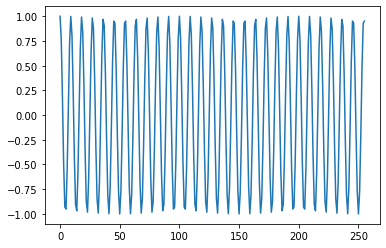

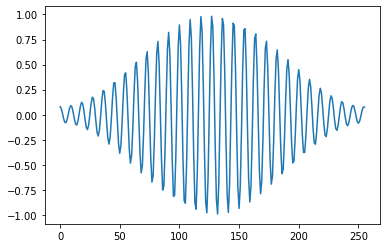

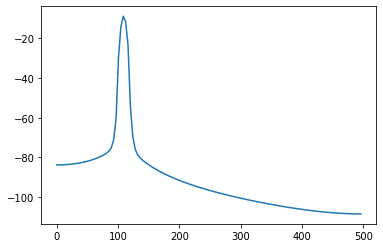

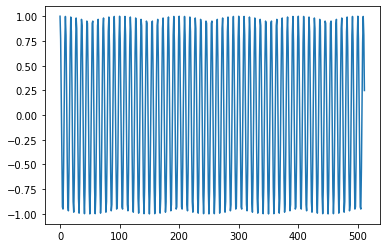

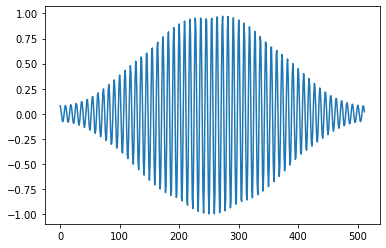

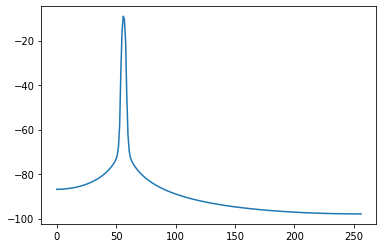

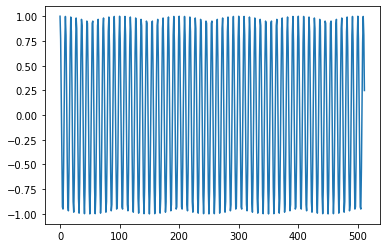

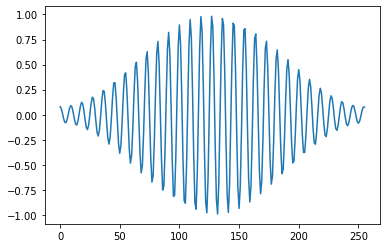

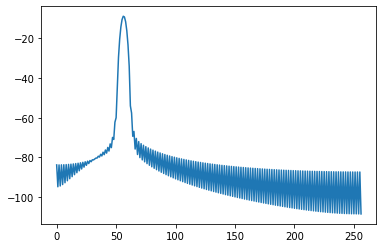

In [1079]:
fs=1000
f=110
l=512
t=np.arange(l)
x=np.cos(2*np.pi*f*t/fs)
M = int(len(x)/2)
xseg = x[:M]
w1 = get_window('hamming',M)
w2 = get_window('hamming',2*M)
mx1,mp1= dftAnal(xseg*w1,w1,M)
mx2,mp2= dftAnal(x*w2,w2,M*2)
mx3,mp3= dftAnal(xseg*w1,w1,M*2)

plt.plot(xseg)
plt.show()
plt.plot(w1*xseg)
plt.show()
plt.plot(np.arange(len(mx1))*(fs/2)/len(mx1),mx1)
plt.show()
plt.plot(x)
plt.show()
plt.plot(w2*x)
plt.show()
plt.plot(np.arange(len(mx2))*(fs/2)/len(mx2),mx2)
plt.show()
plt.plot(x)
plt.show()
plt.plot(w1*xseg)
plt.show()
plt.plot(np.arange(len(mx3))*(fs/2)/len(mx3),mx3)
plt.show()

In [1238]:
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import fft, fftshift
import math
import matplotlib.pyplot as plt
eps = np.finfo(float).eps

""" 
A4-Part-1: Extracting the main lobe of the spectrum of a window

Write a function that extracts the main lobe of the magnitude spectrum of a window given a window 
type and its length (M). The function should return the samples corresponding to the main lobe in 
decibels (dB).

To compute the spectrum, take the FFT size (N) to be 8 times the window length (N = 8*M) (For this 
part, N need not be a power of 2). 

The input arguments to the function are the window type (window) and the length of the window (M). 
The function should return a numpy array containing the samples corresponding to the main lobe of 
the window. 

In the returned numpy array you should include the samples corresponding to both the local minimas
across the main lobe. 

The possible window types that you can expect as input are rectangular ('boxcar'), 'hamming' or
'blackmanharris'.

NOTE: You can approach this question in two ways: 1) You can write code to find the indices of the 
local minimas across the main lobe. 2) You can manually note down the indices of these local minimas 
by plotting and a visual inspection of the spectrum of the window. If done manually, the indices 
have to be obtained for each possible window types separately (as they differ across different 
window types).

Tip: log10(0) is not well defined, so its a common practice to add a small value such as eps = 1e-16 
to the magnitude spectrum before computing it in dB. This is optional and will not affect your answers. 
If you find it difficult to concatenate the two halves of the main lobe, you can first center the 
spectrum using fftshift() and then compute the indexes of the minimas around the main lobe.


Test case 1: If you run your code using window = 'blackmanharris' and M = 100, the output numpy 
array should contain 65 samples.

Test case 2: If you run your code using window = 'boxcar' and M = 120, the output numpy array 
should contain 17 samples.

Test case 3: If you run your code using window = 'hamming' and M = 256, the output numpy array 
should contain 33 samples.

"""


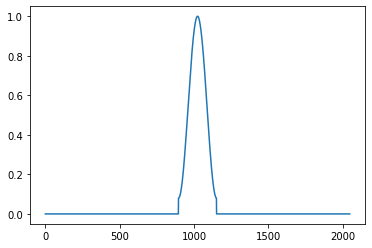

33

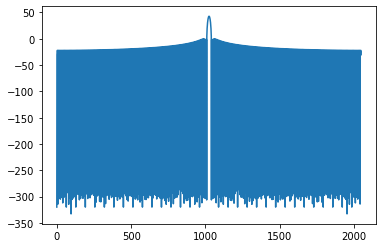

In [1225]:
plt.plot(mws)


C:\Users\Public\Documents\pit\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


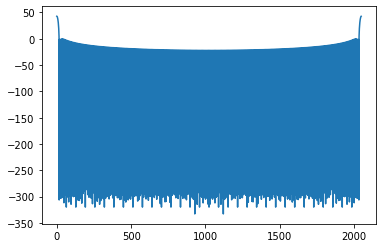

In [1217]:
plt.plot(mw)

In [1218]:
hw= len(w)/2
hm=int(len(mw)/2)
mws=np.zeros(len(mw))
mws[:hm]=mw[hm:]
mws[hm:]=mw[:hm]


C:\Users\Public\Documents\pit\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
C:\Users\Public\Documents\pit\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


In [1191]:
for i in range(len(mws)):
    if mws[i]<-100:
        mws[i]=0

In [1192]:
for i in range(len(mws)):
    if mws[i]==max(mws):
        print(i)
        

1024


In [1194]:
N = 8 * M
hN = N // 2
hN_L = N -hN
w = get_window("hamming", M)

hM = w.size // 2
hM_L = w.size - hM
fftbuffer = np.zeros(N)
fftbuffer[:hM_L] = w[hM:]
fftbuffer[-hM:] = w[:hM]

X = fft(fftbuffer)
mX = 20 * np.log10(np.absolute(X))
mX = np.append(mX[-hN:], mX[:hN_L])

up_begin = 0
for i in range(hN):
    index = hN_L + i
    if mX[index] < mX[index + 1]:
        up_begin = i
        break

result =

C:\Users\Public\Documents\pit\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


In [1482]:
import os
import sys
import numpy as np
import math
from scipy.signal import get_window
import matplotlib.pyplot as plt
import os
os.path.normpath(str.join(os.getcwd(), r'C:\Users\Public\Documents\DSP\sms-tools-master\sounds'))
import stft as STFT
import utilFunctions as UF
eps = np.finfo(float).eps


"""
A4-Part-2: Measuring noise in the reconstructed signal using the STFT model 

Write a function that measures the amount of noise introduced during the analysis and synthesis of a 
signal using the STFT model. Use SNR (signal to noise ratio) in dB to quantify the amount of noise. 
Use the stft() function in stft.py to do an analysis followed by a synthesis of the input signal.

A brief description of the SNR computation can be found in the pdf document (A4-STFT.pdf, in Relevant 
Concepts section) in the assignment directory (A4). Use the time domain energy definition to compute
the SNR.

With the input signal and the obtained output, compute two different SNR values for the following cases:

1) SNR1: Over the entire length of the input and the output signals.
2) SNR2: For the segment of the signals left after discarding M samples from both the start and the 
end, where M is the analysis window length. Note that this computation is done after STFT analysis 
and synthesis.

The input arguments to the function are the wav file name including the path (inputFile), window 
type (window), window length (M), FFT size (N), and hop size (H). The function should return a python 
tuple of both the SNR values in decibels: (SNR1, SNR2). Both SNR1 and SNR2 are float values. 

Test case 1: If you run your code using piano.wav file with 'blackman' window, M = 513, N = 2048 and 
H = 128, the output SNR values should be around: (67.57748352378475, 304.68394693221649).

Test case 2: If you run your code using sax-phrase-short.wav file with 'hamming' window, M = 512, 
N = 1024 and H = 64, the output SNR values should be around: (89.510506656299285, 306.18696700251388).

Test case 3: If you run your code using rain.wav file with 'hann' window, M = 1024, N = 2048 and 
H = 128, the output SNR values should be around: (74.631476225366825, 304.26918192997738).

Due to precision differences on different machines/hardware, compared to the expected SNR values, your 
output values can differ by +/-10dB for SNR1 and +/-100dB for SNR2.
"""

def computeSNR(inputFile, window, M, N, H):
    """
    Input:
            inputFile (string): wav file name including the path 
            window (string): analysis window type (choice of rectangular, triangular, hanning, hamming, 
                    blackman, blackmanharris)
            M (integer): analysis window length (odd positive integer)
            N (integer): fft size (power of two, > M)
            H (integer): hop size for the stft computation
    Output:
            The function should return a python tuple of both the SNR values (SNR1, SNR2)
            SNR1 and SNR2 are floats.
    """
    ## your code here
    xfs,x=wavread(inputFile)
    xs =stft.stft(s, w, N,H)
    E1=sum(abs(x)**2)
    E2=sum(abs(xs)**2)
    En=sum(abs(x-xs)**2)
    srn=10*np.log10(E1/En+eps)
    xt=x[M : -M]
    xts=xs[M :-M]
    E1t=sum(abs(xt)**2)
    E2t=sum(abs(xts)**2)
    Ent=sum(abs(xt-xts)**2)
    srn2=10*np.log10(E1t/Ent+eps)
    return srn,srn2

In [1674]:
import os
import sys
import numpy as np
from scipy.signal import get_window
import matplotlib.pyplot as plt

os.path.normpath(str.join(os.getcwd(), r'C:\Users\Public\Documents\DSP\sms-tools-master\sounds'))
import stft
import utilFunctions as UF

eps = np.finfo(float).eps

"""
A4-Part-3: Computing band-wise energy envelopes of a signal

Write a function that computes band-wise energy envelopes of a given audio signal by using the STFT.
Consider two frequency bands for this question, low and high. The low frequency band is the set of 
all the frequencies between 0 and 3000 Hz and the high frequency band is the set of all the 
frequencies between 3000 and 10000 Hz (excluding the boundary frequencies in both the cases). 
At a given frame, the value of the energy envelope of a band can be computed as the sum of squared 
values of all the frequency coefficients in that band. Compute the energy envelopes in decibels. 

Refer to "A4-STFT.pdf" document for further details on computing bandwise energy.

The input arguments to the function are the wav file name including the path (inputFile), window 
type (window), window length (M), FFT size (N) and hop size (H). The function should return a numpy 
array with two columns, where the first column is the energy envelope of the low frequency band and 
the second column is that of the high frequency band.

Use stft.stftAnal() to obtain the STFT magnitude spectrum for all the audio frames. Then compute two 
energy values for each frequency band specified. While calculating frequency bins for each frequency 
band, consider only the bins that are within the specified frequency range. For example, for the low 
frequency band consider only the bins with frequency > 0 Hz and < 3000 Hz (you can use np.where() to 
find those bin indexes). This way we also remove the DC offset in the signal in energy envelope 
computation. The frequency corresponding to the bin index k can be computed as k*fs/N, where fs is 
the sampling rate of the signal.

To get a better understanding of the energy envelope and its characteristics you can plot the envelopes 
together with the spectrogram of the signal. You can use matplotlib plotting library for this purpose. 
To visualize the spectrogram of a signal, a good option is to use colormesh. You can reuse the code in
sms-tools/lectures/4-STFT/plots-code/spectrogram.py. Either overlay the envelopes on the spectrogram 
or plot them in a different subplot. Make sure you use the same range of the x-axis for both the 
spectrogram and the energy envelopes.

NOTE: Running these test cases might take a few seconds depending on your hardware.

Test case 1: Use piano.wav file with window = 'blackman', M = 513, N = 1024 and H = 128 as input. 
The bin indexes of the low frequency band span from 1 to 69 (69 samples) and of the high frequency 
band span from 70 to 232 (163 samples). To numerically compare your output, use loadTestCases.py
script to obtain the expected output.

Test case 2: Use piano.wav file with window = 'blackman', M = 2047, N = 4096 and H = 128 as input. 
The bin indexes of the low frequency band span from 1 to 278 (278 samples) and of the high frequency 
band span from 279 to 928 (650 samples). To numerically compare your output, use loadTestCases.py
script to obtain the expected output.

Test case 3: Use sax-phrase-short.wav file with window = 'hamming', M = 513, N = 2048 and H = 256 as 
input. The bin indexes of the low frequency band span from 1 to 139 (139 samples) and of the high 
frequency band span from 140 to 464 (325 samples). To numerically compare your output, use 
loadTestCases.py script to obtain the expected output.

In addition to comparing results with the expected output, you can also plot your output for these 
test cases.You can clearly notice the sharp attacks and decay of the piano notes for test case 1 
(See figure in the accompanying pdf). You can compare this with the output from test case 2 that 
uses a larger window. You can infer the influence of window size on sharpness of the note attacks 
and discuss it on the forums.
"""
def computeEngEnv(inputFile, window, M, N, H):
    """
    Inputs:
            inputFile (string): input sound file (monophonic with sampling rate of 44100)
            window (string): analysis window type (choice of rectangular, triangular, hanning, 
                hamming, blackman, blackmanharris)
            M (integer): analysis window size (odd positive integer)
            N (integer): FFT size (power of 2, such that N > M)
            H (integer): hop size for the stft computation
    Output:
            The function should return a numpy array engEnv with shape Kx2, K = Number of frames
            containing energy envelop of the signal in decibles (dB) scale
            engEnv[:,0]: Energy envelope in band 0 < f < 3000 Hz (in dB)
            engEnv[:,1]: Energy envelope in band 3000 < f < 10000 Hz (in dB)
    """
    
    ### your code here
    fs,s=wavread(FileName)
    w=get_window(window,M)
    x,xp=stft.stftAnal(s, w, N,H)
    x=np.asarray(x)
    len3000=int(3000*N/fs)
    len10000=int(10000*N/fs)
    Eb3=np.zeros(len(x[0]))
    Eb10=np.zeros(len(x[0]))
    j=0
    #energi band 3000
    for i in x:
        if j <len(x[0]):
            p=i[:len3000]
            Eb3[j]=10*np.log10(sum(abs(p)**2))
            j=j+1
    #energy band 10000   
    j=0    
    for i in x:
        if j <len(x[0]):
            p=i[len3000:len10000]
            Eb10[j]=10*np.log10(sum(abs(p)**2))
            j=j+1     
    return np.column_stack((Eb3,Eb10))

    

In [1727]:
import os
import sys
import numpy as np
from scipy.signal import get_window
import matplotlib.pyplot as plt
import math

os.path.normpath(str.join(os.getcwd(), r'C:\Users\Public\Documents\DSP\sms-tools-master\sounds'))
import stft
import utilFunctions as UF

eps = np.finfo(float).eps

"""
A4-Part-4: Computing onset detection function (Optional)

Write a function to compute a simple onset detection function (ODF) using the STFT. Compute two ODFs 
one for each of the frequency bands, low and high. The low frequency band is the set of all the 
frequencies between 0 and 3000 Hz and the high frequency band is the set of all the frequencies 
between 3000 and 10000 Hz (excluding the boundary frequencies in both the cases). 

A brief description of the onset detection function can be found in the pdf document (A4-STFT.pdf, 
in Relevant Concepts section) in the assignment directory (A4). Start with an initial condition of 
ODF(0) = 0 in order to make the length of the ODF same as that of the energy envelope. Remember to 
apply a half wave rectification on the ODF. 

The input arguments to the function are the wav file name including the path (inputFile), window 
type (window), window length (M), FFT size (N), and hop size (H). The function should return a numpy 
array with two columns, where the first column is the ODF computed on the low frequency band and the 
second column is the ODF computed on the high frequency band.

Use stft.stftAnal() to obtain the STFT magnitude spectrum for all the audio frames. Then compute two 
energy values for each frequency band specified. While calculating frequency bins for each frequency 
band, consider only the bins that are within the specified frequency range. For example, for the low 
frequency band consider only the bins with frequency > 0 Hz and < 3000 Hz (you can use np.where() to 
find those bin indexes). This way we also remove the DC offset in the signal in energy envelope 
computation. The frequency corresponding to the bin index k can be computed as k*fs/N, where fs is 
the sampling rate of the signal.

To get a better understanding of the energy envelope and its characteristics you can plot the envelopes 
together with the spectrogram of the signal. You can use matplotlib plotting library for this purpose. 
To visualize the spectrogram of a signal, a good option is to use colormesh. You can reuse the code in
sms-tools/lectures/4-STFT/plots-code/spectrogram.py. Either overlay the envelopes on the spectrogram 
or plot them in a different subplot. Make sure you use the same range of the x-axis for both the 
spectrogram and the energy envelopes.

NOTE: Running these test cases might take a few seconds depending on your hardware.

Test case 1: Use piano.wav file with window = 'blackman', M = 513, N = 1024 and H = 128 as input. 
The bin indexes of the low frequency band span from 1 to 69 (69 samples) and of the high frequency 
band span from 70 to 232 (163 samples). To numerically compare your output, use loadTestCases.py
script to obtain the expected output.

Test case 2: Use piano.wav file with window = 'blackman', M = 2047, N = 4096 and H = 128 as input. 
The bin indexes of the low frequency band span from 1 to 278 (278 samples) and of the high frequency 
band span from 279 to 928 (650 samples). To numerically compare your output, use loadTestCases.py
script to obtain the expected output.

Test case 3: Use sax-phrase-short.wav file with window = 'hamming', M = 513, N = 2048 and H = 256 as 
input. The bin indexes of the low frequency band span from 1 to 139 (139 samples) and of the high 
frequency band span from 140 to 464 (325 samples). To numerically compare your output, use 
loadTestCases.py script to obtain the expected output.

In addition to comparing results with the expected output, you can also plot your output for these 
test cases. For test case 1, you can clearly see that the ODFs have sharp peaks at the onset of the 
piano notes (See figure in the accompanying pdf). You will notice exactly 6 peaks that are above 
10 dB value in the ODF computed on the high frequency band. 
"""

def computeODF(inputFile, window, M, N, H):
    """
    Inputs:
            inputFile (string): input sound file (monophonic with sampling rate of 44100)
            window (string): analysis window type (choice of rectangular, triangular, hanning, hamming, 
                blackman, blackmanharris)
            M (integer): analysis window size (odd integer value)
            N (integer): fft size (power of two, bigger or equal than than M)
            H (integer): hop size for the STFT computation
    Output:
            The function should return a numpy array with two columns, where the first column is the ODF 
            computed on the low frequency band and the second column is the ODF computed on the high 
            frequency band.
            ODF[:,0]: ODF computed in band 0 < f < 3000 Hz 
            ODF[:,1]: ODF computed in band 3000 < f < 10000 Hz
    """
    
    ### your code here
    fs,s=wavread(FileName)
    w=get_window(window,M)
    x,xp=stft.stftAnal(s, w, N,H)
    x=np.asarray(x)
    len3000=int(3000*N/fs)
    len10000=int(10000*N/fs)
    Eb3=np.zeros(len(x[0]))
    Eb10=np.zeros(len(x[0]))
    j=0
    #energi band 3000
    for i in x:
        if j <len(x[0]):
            p=i[:len3000]
            Eb3[j]=sum(abs(p)**2)
            j=j+1
    #energy band 10000   
    j=0    
    for i in x:
        if j <len(x[0]):
            p=i[len3000:len10000]
            Eb10[j]=sum(abs(p)**2)
            j=j+1
    odf3=np.diff(10*np.log10(Eb3))
    odf10=np.diff(10*np.log10(Eb10))
    k=0
    if odf3[k]<0:
        odf3[k]=0
    if odf10[k]<0:
        odf10[k]=0
    return odf3,odf10


       
    
        

In [2149]:
import numpy as np
from scipy.signal import get_window
import math
import sys, os
os.path.normpath(str.join(os.getcwd(), r'C:\Users\Public\Documents\DSP\sms-tools-master\sounds'))
import dftModel as DFT
import utilFunctions as UF

""" 
A5-Part-1: Minimizing the frequency estimation error of a sinusoid

Write a function that estimates the frequency of a sinusoidal signal at a given time instant. The 
function should return the estimated frequency in Hz, together with the window size and the FFT 
size used in the analysis.  

The input arguments to the function are the wav file name including the path (inputFile) containing 
the sinusoidal signal, and the frequency of the sinusoid in Hz (f). The frequency of the input sinusoid  
can range between 100Hz and 2000Hz. The function should return a three element tuple of the estimated 
frequency of the sinusoid (fEst), the window size (M) and the FFT size (N) used.

The input wav file is a stationary audio signal consisting of a single sinusoid of length >=1 second. 
Since the signal is stationary you can just perform the analysis in a single frame, for example in 
the middle of the sound file (time equal to .5 seconds). The analysis process would be to first select 
a fragment of the signal equal to the window size, M, centered at .5 seconds, then compute the DFT 
using the dftAnal function, and finally use the peakDetection and peakInterp functions to obtain the 
frequency value of the sinusoid.

Use a Blackman window for analysis and a magnitude threshold t = -40 dB for peak picking. The window
size and FFT size should be chosen such that the difference between the true frequency (f) and the 
estimated frequency (fEst) is less than 0.05 Hz for the entire allowed frequency range of the input 
sinusoid. The window size should be the minimum positive integer of the form 100*k + 1 (where k is a 
positive integer) for which the frequency estimation error is < 0.05 Hz. For a window size M, take the
FFT size (N) to be the smallest power of 2 larger than M. 

HINT: Computing M theoritically using a formula might be complex in such cases. Instead, you need to 
follow a heuristic approach to determine the optimal value of M and N for a particular f. You can iterate
over all allowed values of window size M and stop when the condition is satisfied (i.e. the frequency
estimation error < 0.05 Hz).

Test case 1: If you run your code with inputFile = '../../sounds/sine-490.wav', f = 490.0 Hz, the optimal
values are M = 1101, N = 2048, fEst = 489.963 and the freqency estimation error is 0.037.

Test case 2: If you run your code with inputFile = '../../sounds/sine-1000.wav', f = 1000.0 Hz, the optimal
values are M = 1101, N = 2048, fEst = 1000.02 and the freqency estimation error is 0.02.

Test case 3: If you run your code with inputFile = '../../sounds/sine-200.wav', f = 200.0 Hz, the optimal
values are M = 1201, N = 2048, fEst = 200.038 and the freqency estimation error is 0.038.
"""
def minFreqEstErr(inputFile, f):
    """
    Inputs:
            inputFile (string) = wav file including the path
            f (float) = frequency of the sinusoid present in the input audio signal (Hz)
    Output:
            fEst (float) = Estimated frequency of the sinusoid (Hz)
            M (int) = Window size
            N (int) = FFT size
    """
    # analysis parameters:
    window = 'blackman'
    t = -40
    
    ### Your code here 
    fs,s=wavread(FileName)
    durin=len(s)/fs
    k=1
    M=101
    N=128
    w = get_window('blackman',M)
    hm1=math.floor(len(w)/2)
    hm2=math.floor((len(w)/2+1))
    hfs=math.floor(fs/2)
    cer=[]


    frame= s[hfs-hm1:hfs+hm2]
    X,Xf=dftAnal(frame,w,N)
    peak=UF.peakDetection(X,-40)
    iploc,ipmag,ipphase=UF.peakInterp(X,Xf,peak)
    err=abs(490-iploc*fs/N)
    while err[0] > 0.05:
        k=k+1
        M=100*k+1

        if M>N:
            N=N*2
            print(f"N:={N}")
            print(f"M:= {M}")


        w = get_window('blackman',M)
        hm1=math.floor(len(w)/2)
        hm2=math.floor((len(w)/2+1))
        frame= s[hfs-hm1:hfs+hm2]    

        X,Xf=dftAnal(frame,w,N)
        peak=UF.peakDetection(X,-40)
        iploc,ipmag,ipphase=UF.peakInterp(X,Xf,peak)
        err=abs(f-iploc*fs/N)
        fest=iploc*fs/N
        cer =np.append(cer,err)
        return np.stack(fest,M,N)


      



In [2236]:
import numpy as np
from scipy.signal import get_window
import sys, os
os.path.normpath(str.join(os.getcwd(), r'C:\Users\Public\Documents\DSP\sms-tools-master\sounds'))
import stft
import utilFunctions as UF
import sineModel as SM
import matplotlib.pyplot as plt
""" 
A5-Part-2: Tracking a two component chirp 

Perform a "good" sinusoidal analysis of a two component chirp by specifying the parameter 
window-size in the function chirpTracker() below. The estimation and tracking of the two varying 
frequencies should result in a mean error smaller than 2Hz. The function returns the parameters 
used, true and estimated tracks of frequency components, and their associated time stamps. 

In this part, you will use the sound chirp-150-190-linear.wav, which is a linear chirp with two 
sinusoids of 150Hz and 190 Hz, whose frequency increases in two seconds to 1400Hz and 1440Hz 
respectively. Listen to the sound and use sms-tools GUI or sonic visualizer to see its spectrogram. 

You will not write any additional code in this question, but modify the parameter of the code to 
obtain the best possible results. There are three functions we have written for you. Please go through 
each function and understand it, but do not modify any of it.
1. chirpTracker(): This is the main function. Uses sineModel.py for sinusoidal analysis of the input 
sound. It takes an input audio file and uses the function sineModel.sineModelAnal() to obtain the two 
frequency tracks (fTrackEst) in the chirp and computes the estimation error (meanErr) using the true 
frequency tracks obtained using genTrueFreqTracks().

chirpTracker() calls the following two functions:
2. genTimeStamps(): Generates the time stamps at which the frequencies of sinusoids are estimated (one 
value per frame)
3. genTrueFreqTracks(): For the input sound chirp-150-190-linear.wav, the function generates the true 
frequency values, so that we can compare the true and the estimated frequency values. 

We will use the sinusoidal model to analyse this sound and extract the two components. We will use the 
sineModel.sineModelAnal() function for analysis. The code for analysis is already provided below 
with some parameters we have fixed. For analysis, we will use a blackman window. Since we need only 
two frequency component estimates every frame, we set maxnSines = 2. 

Choose the parameter window-size (M) such that the mean estimation error (meanErr) of each frequency 
component is less than 2 Hz. There is a range of values of M for which this is true and all of those 
values will be considered correct answers. You can plot the estimated and true frequency tracks to 
visualize the accuracy of estimation. 

We have written the function chirpTracker() for you and you just have to edit M. It is marked as XX 
and you can edit its value as needed. 

As an example, choosing M = 1023, the mean estimation error is [13.677,  518.409] Hz, 
which as you can see do not give us the desired estimation errors. 

"""
def chirpTracker(inputFile='../../sounds/chirp-150-190-linear.wav'):
    """
    Input:
           inputFile (string) = wav file including the path
    Output:
           M (int) = Window length
           H (int) = hop size in samples
           tStamps (numpy array) = A Kx1 numpy array of time stamps at which the frequency components were estimated
           fTrackEst (numpy array) = A Kx2 numpy array of estimated frequency values, one row per time frame, one column per component
           fTrackTrue (numpy array) = A Kx2 numpy array of true frequency values, one row per time frame, one column per component
           K is the number of frames
    """

    # Analysis parameters: Modify values of the parameters marked XX
    M = 101                              # Window size in samples
    
    ### Go through the code below and understand it, do not modify anything ###    
    H = 128                                     # Hop size in samples
    N = int(pow(2, np.ceil(np.log2(M))))        # FFT Size, power of 2 larger than M
    t = -80.0                                   # threshold
    window = 'blackman'                         # Window type
    maxnSines = 2                               # Maximum number of sinusoids at any time frame
    minSineDur = 0.0                            # minimum duration set to zero to not do tracking
    freqDevOffset = 30                          # minimum frequency deviation at 0Hz
    freqDevSlope = 0.001                        # slope increase of minimum frequency deviation
    
    fs, x = UF.wavread(inputFile)               # read input sound
    w = get_window(window, M)                   # Compute analysis window
    tStamps = genTimeStamps(x.size, M, fs, H)   # Generate the tStamps to return
    # analyze the sound with the sinusoidal model
    fTrackEst, mTrackEst, pTrackEst = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
    fTrackTrue = genTrueFreqTracks(tStamps)     # Generate the true frequency tracks
    tailF = 20                                 
    # Compute mean estimation error. 20 frames at the beginning and end not used to compute error
    meanErr = np.mean(np.abs(fTrackTrue[tailF:-tailF,:] - fTrackEst[tailF:-tailF,:]),axis=0)     
    print ("Mean estimation error = " + str(meanErr) + ' Hz')      # Print the error to terminal    
    # Plot the estimated and true frequency tracks
    mX, pX = stft.stftAnal(x, w, N, H)
    k=0
    while meanErr[0] and meanErr[1] > 2:
        k=k+1
        M=100*k+1
        print(M)
        N = int(pow(2, np.ceil(np.log2(M))))        # FFT Size, power of 2 larger than M
        t = -80.0                                   # threshold
        window = 'blackman'                         # Window type
        maxnSines = 2                               # Maximum number of sinusoids at any time frame
        minSineDur = 0.0                            # minimum duration set to zero to not do tracking
        freqDevOffset = 30                          # minimum frequency deviation at 0Hz
        freqDevSlope = 0.001                        # slope increase of minimum frequency deviation

        fs, x = UF.wavread(inputFile)               # read input sound
        w = get_window(window, M)                   # Compute analysis window
        tStamps = genTimeStamps(x.size, M, fs, H)   # Generate the tStamps to return
        # analyze the sound with the sinusoidal model
        fTrackEst, mTrackEst, pTrackEst = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
        fTrackTrue = genTrueFreqTracks(tStamps)     # Generate the true frequency tracks
        tailF = 20                                 
        # Compute mean estimation error. 20 frames at the beginning and end not used to compute error
        meanErr = np.mean(np.abs(fTrackTrue[tailF:-tailF,:] - fTrackEst[tailF:-tailF,:]),axis=0)     
        print ("Mean estimation error = " + str(meanErr) + ' Hz')      # Print the error to terminal    
        # Plot the estimated and true frequency tracks
    mX, pX = stft.stftAnal(x, w, N, H)
    maxplotfreq = 1500.0
    binFreq = fs*np.arange(N*maxplotfreq/fs)/N
    plt.pcolormesh(tStamps, binFreq, np.transpose(mX[:,:int(N*maxplotfreq/fs+1)]),cmap = 'hot_r')
    plt.plot(tStamps,fTrackTrue, 'o-', color = 'c', linewidth=3.0)
    plt.plot(tStamps,fTrackEst, color = 'y', linewidth=2.0)
    plt.legend(('True f1', 'True f2', 'Estimated f1', 'Estimated f2'))
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.autoscale(tight=True)
    plt.show()
    
    return M, H, tStamps, fTrackEst, fTrackTrue  # Output returned 

### Do not modify this function
def genTimeStamps(xlen, M, fs, H):
    # Generates the timeStamps as needed for output
    hM1 = int(np.floor((M+1)/2))                     
    hM2 = int(np.floor(M/2))                         
    xlen = xlen + 2*hM2
    pin = hM1
    pend = xlen - hM1                                     
    tStamps = np.arange(pin,pend,H)/float(fs)
    return tStamps

### Do not modify this function
def genTrueFreqTracks(tStamps):
    # Generates the true frequency values to compute estimation error
    # Specifically to chirp-150-190-linear.wav
    fTrack = np.zeros((len(tStamps),2))
    fTrack[:,0] = np.transpose(np.linspace(190, 190+1250, len(tStamps)))
    fTrack[:,1] = np.transpose(np.linspace(150, 150+1250, len(tStamps)))
    return fTrack
    



In [2237]:
def mainlobeTracker(inputFile = '../../sounds/sines-440-602-hRange.wav'):
    """
    Input:
           inputFile (string): wav file including the path
    Output:
           window (string): The window type used for analysis
           t (float) = peak picking threshold (negative dB)
           tStamps (numpy array) = A Kx1 numpy array of time stamps at which the frequency components were estimated
           fTrackEst = A Kx2 numpy array of estimated frequency values, one row per time frame, one column per component
           fTrackTrue = A Kx2 numpy array of true frequency values, one row per time frame, one column per component
    """       
    # Analysis parameters: Modify values of the parameters marked XX
    window = XX                                          # Window type
    t = XX                                               # threshold (negative dB)
    
    ### Go through the code below and understand it, do not modify anything ###   
    M = 2047                                             # Window size 
    N = 4096                                             # FFT Size
    H = 128                                              # Hop size in samples
    maxnSines = 2
    minSineDur = 0.02
    freqDevOffset = 10
    freqDevSlope = 0.001
    # read input sound
    fs, x = UF.wavread(inputFile)               
    w = get_window(window, M)                   # Compute analysis window
    tStamps = genTimeStamps(x.size, M, fs, H)   # Generate the tStamps to return
    # analyze the sound with the sinusoidal model
    fTrackEst, mTrackEst, pTrackEst = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
    fTrackTrue = genTrueFreqTracks(tStamps)     # Generate the true frequency tracks
    tailF = 20                                 
    # Compute mean estimation error. 20 frames at the beginning and end not used to compute error
    meanErr = np.mean(np.abs(fTrackTrue[tailF:-tailF,:] - fTrackEst[tailF:-tailF,:]),axis=0)     
    print ("Mean estimation error = " + str(meanErr) + ' Hz')      # Print the error to terminal
    # Plot the estimated and true frequency tracks
    mX, pX = stft.stftAnal(x, w, N, H)
    maxplotfreq = 900.0
    binFreq = fs*np.arange(N*maxplotfreq/fs)/N
    plt.pcolormesh(tStamps, binFreq, np.transpose(mX[:,:N*maxplotfreq/fs+1]), cmap='hot_r')
    plt.plot(tStamps,fTrackTrue, 'o-', color = 'c', linewidth=3.0)
    plt.plot(tStamps,fTrackEst, color = 'y', linewidth=2.0)
    plt.legend(('True f1', 'True f2', 'Estimated f1', 'Estimated f2'))
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.autoscale(tight=True)
    return window, float(t), tStamps, fTrackEst, fTrackTrue  # Output returned 

### Do not modify this function
def genTimeStamps(xlen, M, fs, H):
    # Generates the timeStamps as needed for output
    hM1 = int(np.floor((M+1)/2))                     
    hM2 = int(np.floor(M/2))                         
    xlen = xlen + 2*hM2
    pin = hM1
    pend = xlen - hM1                                     
    tStamps = np.arange(pin,pend,H)/float(fs)
    return tStamps

### Do not modify this function
def genTrueFreqTracks(tStamps):
    # Generates the true frequency values to compute estimation error
    # Specifically to sines-440-602-hRange.wav
    fTrack = np.zeros((len(tStamps),2))
    fTrack[:,0] = np.transpose(440*np.ones((len(tStamps),1)))
    fTrack[:,1] = np.transpose(602*np.ones((len(tStamps),1)))
    return fTrack


1325

In [ ]:
import numpy as np
from scipy.signal import get_window
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)), '../../software/models/'))
import stft
import utilFunctions as UF
import sineModel as SM
import matplotlib.pyplot as plt

"""
A5-Part-3: Tracking sinusoids of different amplitudes 

Perform a "good" sinusoidal analysis of a signal with two sinusoidal components of different amplitudes 
by specifying the parameters 'window type' and 'peak picking threshold' in the function mainlobeTracker() 
below. The function should return the parameters used, true and estimated tracks of frequency components, 
and their associated time stamps. 

We will consider a signal that has two sinusoidal components with a very large difference in their 
amplitude. We will use a synthetically generated signal with frequency components 440 Hz and 602 Hz, 
s = sin(2*pi*440*t) + 2e-3*sin(2*pi*602*t). As you see the amplitude difference is large. You will 
use the sound sines-440-602-hRange.wav. Listen to the sound and use sms-tools GUI or sonic visualizer 
to see its spectrogram. Notice the difference in the amplitudes of its components. 

You will not write any additional code in this question, but modify the parameters of the code to obtain 
the best possible results. There are three functions we have written for you. Please go through each 
function and understand it, but do not modify any of it.
1. mainlobeTracker(): This is the main function. Uses sineModel.py for sinusoidal analysis of the input 
sound. It takes an input audio file and uses the function sineModel.sineModelAnal(), tracks the mainlobes 
of the two sinusoids to obtain the two frequency tracks (fTrackEst) in the signal. It also computes the 
estimation error (meanErr) in frequency using the true frequency tracks obtained using genTrueFreqTracks().

mainlobeTracker() calls the following two functions:
2. genTimeStamps(): Generates the time stamps at which the sinuosid frequencies are estimated (one 
value per audio frame)
3. genTrueFreqTracks(): For the input sound sines-440-602-hRange.wav, the function generates the true 
frequency values, so that we can compare the true and the estimated frequency values. 

We will use sinusoidal Model to analyse this sound and extract the two components. We will use the 
sineModel.sineModelAnal() function for analysis. The code for analysis is already provided below with 
some parameters we have fixed. For analysis, we will use a window length (M) of 2047 samples, an FFT 
size (N) of 4096 samples and hop size (H) of 128 samples. For sine tracking, we set the minimum sine 
duration (minSineDur) to 0.02 seconds, freqDevOffset to 10 Hz and freqDevSlope to its default value of 
0.001. Since we need only two frequency component estimates at every frame, we set maxnSines = 2. 

Choose the parameters window and the peak picking threshold (t) such that the mean estimation error of 
each frequency components is less than 2 Hz. There is a range of values of M and t for which this is 
true and all of those values will be considered correct answers. You can plot the estimated and true 
frequency tracks to visualize the accuracy of estimation. The output is the set of parameters you used: 
window, t, the time stamps, estimated and the true frequency tracks. Note that choosing the wrong window 
might lead to tracking of one of the sidelobes of the high amplitude sinusoid instead of the mainlobe of 
the low amplitude sinusoid. 

We have written the function mainlobeTracker() and you have to edit the window and t values. For the window, choose 
one of 'boxcar', 'hanning', 'hamming', 'blackman', or 'blackmanharris'. t is specified in negative dB. These two 
parameters are marked as XX and you can edit the values as needed. 

As an example, choosing window = 'boxcar', t = -80.0, the mean estimation error is [0.142, 129.462] Hz. 
"""

def mainlobeTracker(inputFile = '../../sounds/sines-440-602-hRange.wav'):
    """
    Input:
           inputFile (string): wav file including the path
    Output:
           window (string): The window type used for analysis
           t (float) = peak picking threshold (negative dB)
           tStamps (numpy array) = A Kx1 numpy array of time stamps at which the frequency components were estimated
           fTrackEst = A Kx2 numpy array of estimated frequency values, one row per time frame, one column per component
           fTrackTrue = A Kx2 numpy array of true frequency values, one row per time frame, one column per component
    """       
    # Analysis parameters: Modify values of the parameters marked XX
    window = XX                                          # Window type
    t = XX                                               # threshold (negative dB)
    
    ### Go through the code below and understand it, do not modify anything ###   
    M = 2047                                             # Window size 
    N = 4096                                             # FFT Size
    H = 128                                              # Hop size in samples
    maxnSines = 2
    minSineDur = 0.02
    freqDevOffset = 10
    freqDevSlope = 0.001
    # read input sound
    fs, x = UF.wavread(inputFile)               
    w = get_window(window, M)                   # Compute analysis window
    tStamps = genTimeStamps(x.size, M, fs, H)   # Generate the tStamps to return
    # analyze the sound with the sinusoidal model
    fTrackEst, mTrackEst, pTrackEst = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
    fTrackTrue = genTrueFreqTracks(tStamps)     # Generate the true frequency tracks
    tailF = 20                                 
    # Compute mean estimation error. 20 frames at the beginning and end not used to compute error
    meanErr = np.mean(np.abs(fTrackTrue[tailF:-tailF,:] - fTrackEst[tailF:-tailF,:]),axis=0)     
    print ("Mean estimation error = " + str(meanErr) + ' Hz')      # Print the error to terminal
    # Plot the estimated and true frequency tracks
    mX, pX = stft.stftAnal(x, w, N, H)
    maxplotfreq = 900.0
    binFreq = fs*np.arange(N*maxplotfreq/fs)/N
    plt.pcolormesh(tStamps, binFreq, np.transpose(mX[:,:N*maxplotfreq/fs+1]), cmap='hot_r')
    plt.plot(tStamps,fTrackTrue, 'o-', color = 'c', linewidth=3.0)
    plt.plot(tStamps,fTrackEst, color = 'y', linewidth=2.0)
    plt.legend(('True f1', 'True f2', 'Estimated f1', 'Estimated f2'))
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.autoscale(tight=True)
    return window, float(t), tStamps, fTrackEst, fTrackTrue  # Output returned 

### Do not modify this function
def genTimeStamps(xlen, M, fs, H):
    # Generates the timeStamps as needed for output
    hM1 = int(np.floor((M+1)/2))                     
    hM2 = int(np.floor(M/2))                         
    xlen = xlen + 2*hM2
    pin = hM1
    pend = xlen - hM1                                     
    tStamps = np.arange(pin,pend,H)/float(fs)
    return tStamps

### Do not modify this function
def genTrueFreqTracks(tStamps):
    # Generates the true frequency values to compute estimation error
    # Specifically to sines-440-602-hRange.wav
    fTrack = np.zeros((len(tStamps),2))
    fTrack[:,0] = np.transpose(440*np.ones((len(tStamps),1)))
    fTrack[:,1] = np.transpose(602*np.ones((len(tStamps),1)))
    return fTrack
